<a href="https://colab.research.google.com/github/sskamalapurkar/Unsupervised_ML_Clustering/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual


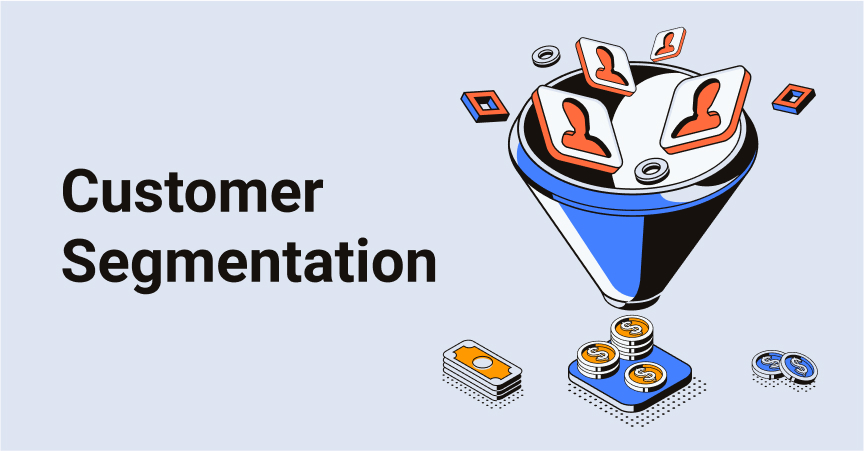

# **Project Summary -**

Companies aim to gain a deeper approach of the customer they are targeting. Therefore, their aim must be specific and should be tailored to address the requirements of every individual customer. Furthermore, through the data collected, companies can gain a deeper understanding of customer preferences as well as the requirements for discovering valuable segments that would reap them maximum profit. This way, they can strategize their marketing techniques more efficiently and minimize the possibility of risk to their investment.



---





**Data Preprocessing:**

* Sourcing the dataset
* Importing libraries and dataset in colab
* Understanding the dataset
* Finding null and duplicate values
* Outlier detection and treatment
* Feature engineering


---


**Exploratory Data Analysis (EDA) on features:**

* Which products are the most and least sold ones?

* Which are the most revenue generating products?

* Which day had the most and least number of purchases?

* On which days most of the revenue generates?

* Which month had the most and least number of purchases?

* In terms of revenue generation, which month is most important?

* Which hour in a day had the most and least number of purchases?

* In which time of the day highest revenue is generated?

* Which countries has the most number of customers?

* Which are the most spending customers?

* Distribution of the numerical features.


---


**Clustering Algorithms used:**

* RFM Modeling
* K-Means Algorithm 
* Elbow Method
* Silhouette Method
* DBSCAN
* Cohort Analysis
---


# **GitHub Link -**

https://github.com/sskamalapurkar/Unsupervised_ML_Clustering

# **Problem Statement**


**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

**In this project, we are required to :**


*   Understand the Dataset & cleanup (if required)

*   Implement clustering model to segment the customer-based similarity

*   find optimal number of clusters

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [154]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.cm as cm
import datetime as dt

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Clustering Algorithms
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Load Dataset

file_path = '/content/drive/MyDrive/Unsupervised ML - Clustering/Online Retail.xlsx'
DataFrame = pd.read_excel(file_path)
df = DataFrame.copy()

### Dataset First View

In [157]:
# Dataset First Look

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [158]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

In [159]:
print("Total retail transactions including each product in every transactions (Rows): ", df.shape[0])
print("Number of features (Columns): ", df.shape[1])

Total retail transactions including each product in every transactions (Rows):  541909
Number of features (Columns):  8


### Dataset Information

In [160]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [161]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


#### Missing Values/Null Values

In [162]:
# Missing Values/Null Values Count

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

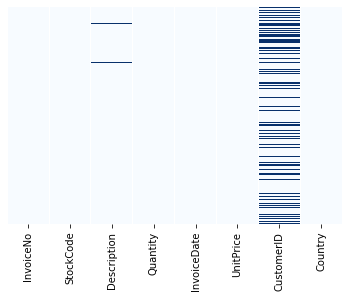

In [163]:
# Visualizing the missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.rcParams['figure.figsize'] = (15, 10)

### What did you know about your dataset?

* **The number of duplicate values in the dataset is -  5268**

* **Only 2 columns have null values in it. Description and CustomerID.**



## ***2. Understanding Your Variables***

In [164]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [165]:
# Dataset Describe

df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


### Variables Description 


|Field Name|Description|
|---|---|
|**InvoiceNo:**|Invoice number. A 6-digit integer number uniquely assigned to each transaction.
||If this code starts with letter 'c', it indicates a cancellation.|
|**StockCode:**|Product (item) code. A 5-digit integer number uniquely assigned to each distinct product.|
|**Description:**|Product (item) name|
|**Quantity:**|The quantities of each product (item) per transaction.|
|**InvoiceDate:**|Invice Date and time. The day and time when each transaction was generated.|
|**UnitPrice:**|Unit price. Product price per unit in sterling.|
|**CustomerID:**|Customer number. A 5-digit integral number uniquely assigned to each customer.|
|**Country:**|Country name. The name of the country where each customer resides.|




---


* **There are 4 features whose datatype is object, 2 features whose datatype is float64, 1 feature whose datatype is datetime64 and 1 feature whose datatype is int64.**

* **Memory usage by the dataset is 33.1 MB.**

* **There are 4070 unique product codes. '85123A' is the most common product code appeared 2301 times.**

* **Majority of customers resides in United Kingdom.**

### Check Unique Values for each variable.

In [166]:
# Check Unique Values for each variable.

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

*   **For 4070 products, there are 25900 transactions in the data. This means that each product is likely to have multiple transactions in the data. There are almost as many products as customers in the data as well.**

*   **In the dataset, we have retail transactions from almost 38 different countries of the world.**

*   **Almost 25900 overall transactions, this includes cancelled transactions too.**

*   **Also, 4223 different items are listed in the dataset.**

*   **Overall customer count in the available dataset is 4372.**

## 3. ***Data Wrangling***

### Data Wrangling Code

In [167]:
# Write your code to make your dataset analysis ready.

# Remove duplicates
df = df.drop(index=df[df.duplicated()].index)
print("Number of rows after removal of duplicates : {}".format(df.shape[0]))



Number of rows after removal of duplicates : 536641


In [168]:
# Inspect min and max Quantity transactions
df.loc[(df['Quantity']==-80995) | (df['Quantity']==80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


**Invoice No. 581483 of 80995 quantity sell of stock code 23843 is reversed by adding a contra entry. Invoice No. of such reversal/cancelled entries starts with letter 'C'**

In [169]:
# Cancelled/Reversed invoices
print("Cancelled invoices/transactions : {}".format(df[df['InvoiceNo'].astype(str).str[0] == 'C'].shape[0]))

df = df[df['InvoiceNo'].astype(str).str[0] != 'C']
df.shape

Cancelled invoices/transactions : 9251


(527390, 8)

In [170]:
#Remove transactions with missing customer ids
df = df.drop(index=df[df['CustomerID'].isnull()].index)
print("Retail transactions after removing missing customer ids  : {}".format(df.shape[0]))

Retail transactions after removing missing customer ids  : 392732


**Outlier Detection and treatment**

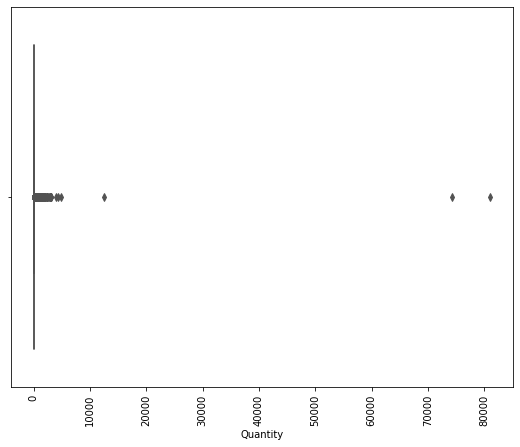

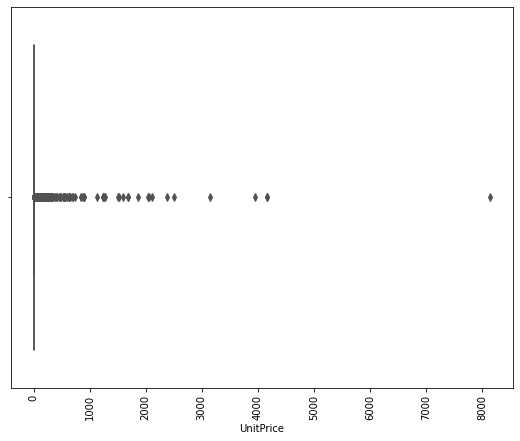

In [171]:
#creating function for visualizing outliers by boxplot

def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.boxplot(df[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)
     

In [172]:
# Creating a function to remove outliers

def remove_outliers(data , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = data[column].quantile(0.75)
  q1 = data[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    data = data[data[column] <= upper_limit]
  else:
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]   
  
  return data

In [173]:
# Removing the outliers using the function created

df = remove_outliers(data = df, column = 'Quantity')
df = remove_outliers(data = df, column = 'UnitPrice')

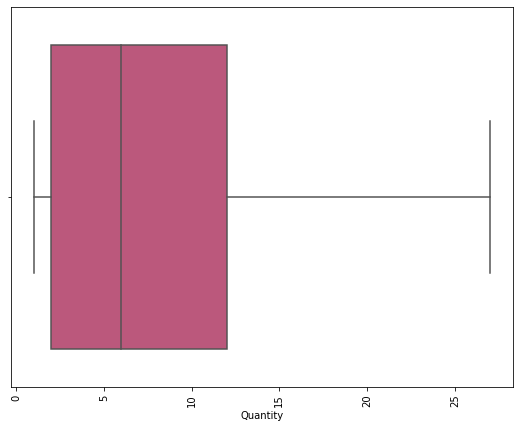

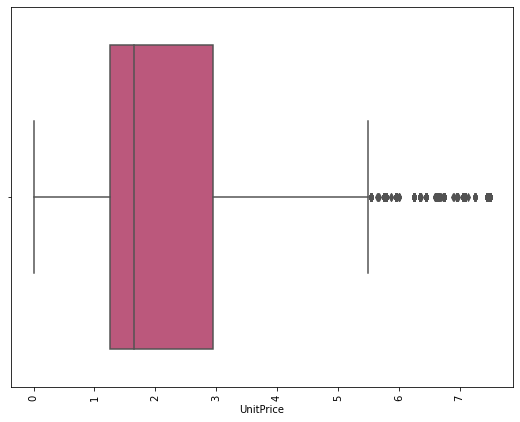

In [174]:
# checking again with boxplot

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)

In [175]:
df.shape

(333265, 8)

### What all manipulations have you done and insights you found?

* So, finally we have 333265 rows and 8 columns in the dataset.

* We have dropped all rows with NaN CustomerID. As we have to deal with customer segmentation in future, we need only those rows where CustomerID is present.

* Also we have removed all duplicate rows as well, as they are of no use to us.


* We have removed all outliers from Quantity and Unit Price columns. Observations from boxplot:

  1. Median of Quantity is 6 and most of the quantities lie between 2 to 12.

  2. 50th percentile for unit price is approx 1.75, and most of the unit prices are between 1.25 to 3.

# **Feature Engineering**

---




We are going to extract more information from the available columns before proceeding to EDA. In the given data, we have very few columns, that is features, hence we will try to create new columns based on available information so as to get more meaningful features for analysing customer behaviour.

In [176]:
#InvoiceDate column has date and time, which we will separate as month, day and hour respectively

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.month
df['day_name'] = df['InvoiceDate'].dt.day_name()
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [177]:
#creating a function to categorise hours in three slots

def day_time(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

      
#creating new column which provides hour slots into three categories

df['day_time']=df['Hour'].apply(day_time)

In [178]:
# From quantity and unit price, we can calculate total sales amount for that perticular transaction

df['Sales_Amount'] = df['Quantity'] * df['UnitPrice']

Customer ID is 5 digit integer number, but in our data column contains float values. So, we will be converting Customer ID from float to int.

In [179]:
# Customer ID - float to int conversion

df['CustomerID'] = df['CustomerID'].apply(int)

In [180]:
# Check the dataset again

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_name,Day,Hour,day_time,Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,Wednesday,1,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,Wednesday,1,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Which products are the most and least sold ones?**

WHITE HANGING HEART T-LIGHT HOLDER    1668
JUMBO BAG RED RETROSPOT               1327
PARTY BUNTING                         1268
LUNCH BAG RED RETROSPOT               1195
ASSORTED COLOUR BIRD ORNAMENT         1146
Name: Description, dtype: int64


Text(0, 0.5, 'product Name')

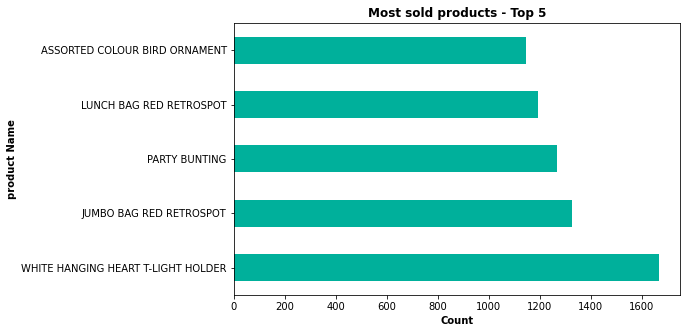

In [181]:
# Chart - 1 visualization code

product_df_top = df['Description'].value_counts()[:5]
print(product_df_top)
product_df_top.plot.barh(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.title("Most sold products - Top 5", weight ='bold')
plt.xlabel("Count", weight='bold')
plt.ylabel('product Name', weight='bold')

In [182]:
product_df_bottom = df['Description'].value_counts()[-5: ]
print(product_df_bottom)

M/COLOUR POM-POM CURTAIN               1
BLUE/GREEN SHELL NECKLACE W PENDANT    1
 I LOVE LONDON MINI RUCKSACK           1
SET 36 COLOURING PENCILS DOILEY        1
RECYCLED ACAPULCO MAT RED              1
Name: Description, dtype: int64


##### 1. Why did you pick the specific chart?

To check the products having highest demand.

##### 2. What is/are the insight(s) found from the chart?

Most sold product is - **WHITE HANGING HEART T-LIGHT HOLDER**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, of course! From this the company can decide the strategies for top 10 products to get maximum profit out of it.

#### Chart - 2
**Which are the most revenue generating products?**

Description
PARTY BUNTING                         34952.85
WHITE HANGING HEART T-LIGHT HOLDER    31763.76
JUMBO BAG RED RETROSPOT               24923.50
SPOTTY BUNTING                        23513.05
ASSORTED COLOUR BIRD ORNAMENT         22940.06
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'product Name')

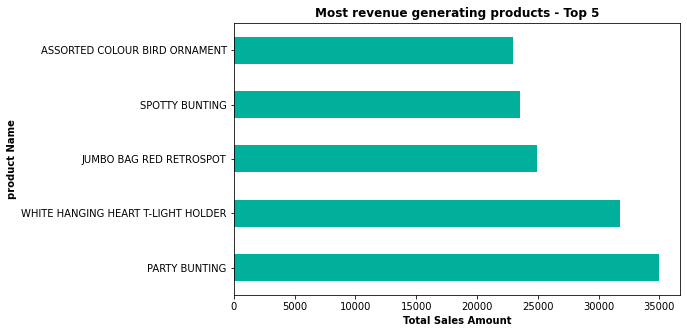

In [183]:
# Chart - 2 visualization code

most_revenue_product_df = df.groupby('Description')['Sales_Amount'].sum().sort_values(ascending=False).head(5)
print(most_revenue_product_df)
most_revenue_product_df.plot.barh(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.title("Most revenue generating products - Top 5", weight ='bold')
plt.xlabel("Total Sales Amount", weight='bold')
plt.ylabel('product Name', weight='bold')

##### 1. Why did you pick the specific chart?

To visualize the products gaining max revenue to the company.

##### 2. What is/are the insight(s) found from the chart?

* Most revenue generating product is - **PARTY BUNTING**

* PARTY BUNTING is the third highest selling product with highest revenue generator

* WHITE HANGING HEART T-LIGHT HOLDER is the top selling product with second highest revenue generator

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the company can revise pricing strategies for top 10 products based on their demand in the market.

#### Chart - 3
**Which day had the most and least number of purchases?**

Thursday     66124
Wednesday    56838
Tuesday      55374
Monday       54609
Sunday       54452
Friday       45868
Name: day_name, dtype: int64


Text(0, 0.5, 'Count')

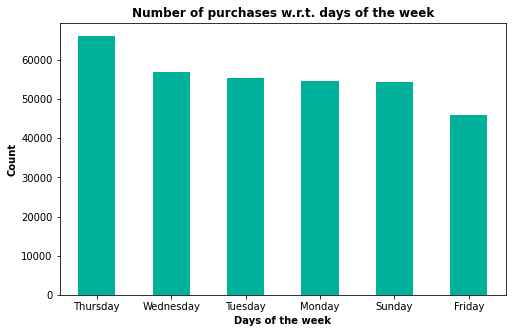

In [184]:
# Chart - 3 visualization code

days_df_top = df['day_name'].value_counts()
print(days_df_top)
days_df_top.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Number of purchases w.r.t. days of the week", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Count', weight='bold')

##### 1. Why did you pick the specific chart?

To see the days on which maximum transactions are happening.

##### 2. What is/are the insight(s) found from the chart?

* Thursday is the most busiest day, on which max transaction are done, followed by Wednesday. Tuesday, Monday and Sunday have approx equal number of transactions.

* There are no transactions on Saturdays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the company can provide expensive products on busy days of the week to get more benefit.

#### Chart - 4
**On which days most of the revenue generates?**

day_name
Thursday     927269.410
Wednesday    771937.560
Tuesday      744324.301
Monday       702198.861
Friday       647459.811
Sunday       506286.241
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

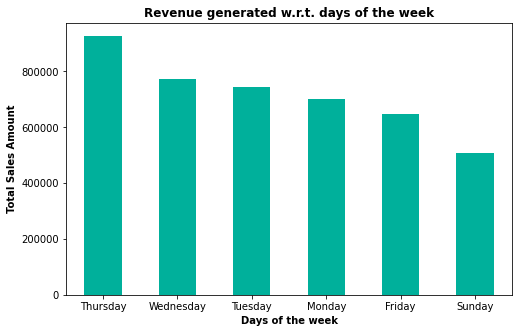

In [185]:
# Chart - 4 visualization code

days_revenue_df = df.groupby('day_name')['Sales_Amount'].sum().sort_values(ascending=False)
print(days_revenue_df)
days_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. days of the week", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To check on the days of the week on which max revenue is generating.

##### 2. What is/are the insight(s) found from the chart?

* Friday was the day on which lowest number of purchases are done, but still in terms of revenue generation Friday is second lowest day of the week. This means that on Friday, products sold were having higher quantity or unit price than Sunday.

* Thursday was the day on which maximum transactions are done, so it was obvious that revenue generation is al expected to be higher compared to other days of the week.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, indeed! This will surely help creating a positive business impact.

#### Chart - 5

**Which month had the most and least number of purchases?**

11    55217
10    42151
12    36468
9     33973
5     23151
8     22482
3     22448
7     22397
6     22317
4     18824
1     17457
2     16380
Name: Month, dtype: int64


Text(0, 0.5, 'Count')

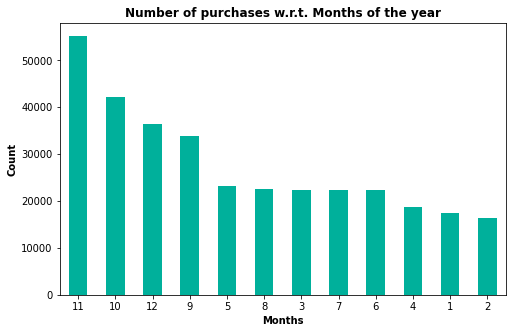

In [186]:
# Chart - 5 visualization code

months_df_top = df['Month'].value_counts()
print(months_df_top)
months_df_top.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Number of purchases w.r.t. Months of the year", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Count', weight='bold')

##### 1. Why did you pick the specific chart?

To check on months in which max transactions are done.

##### 2. What is/are the insight(s) found from the chart?

**September to December are the months in which highest number of purchases are happening.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can keep a wide range of gift items which are related to other important festivals happening in first half of the year. So that, the purchases will be more in those months and so  as revenue generation.

#### Chart - 6

**In terms of revenue generation, which month is most important?**

Month
11    642984.880
10    524843.470
9     480898.852
12    461547.900
5     324899.440
8     305233.840
6     290158.850
7     289068.991
3     285458.420
4     242420.681
1     232767.980
2     219192.880
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

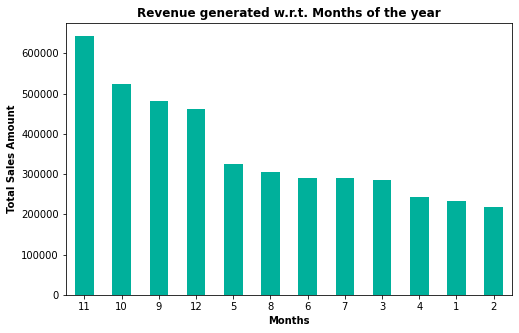

In [187]:
# Chart - 6 visualization code

months_revenue_df = df.groupby('Month')['Sales_Amount'].sum().sort_values(ascending=False)
print(months_revenue_df)
months_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. Months of the year", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To see the revenue generation in all months of the year.

##### 2. What is/are the insight(s) found from the chart?

Same pattern we can see in revenue generation w.r.t. months. September to December, higher number of purchases results in higher revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed! The company can provide wide variety of products as well as some exclusive gift items, so that first two quarters  of the year also yeilds a good amount of revenue.

#### Chart - 7

**Which hour in a day had the most and least number of purchases?**

    Hours  Count
0      12  61044
1      13  54497
2      14  46050
3      11  40956
4      15  38303
5      10  30233
6      16  20500
7       9  17550
8      17  11104
9       8   6964
10     19   2801
11     18   2387
12     20    697
13      7    178
14      6      1


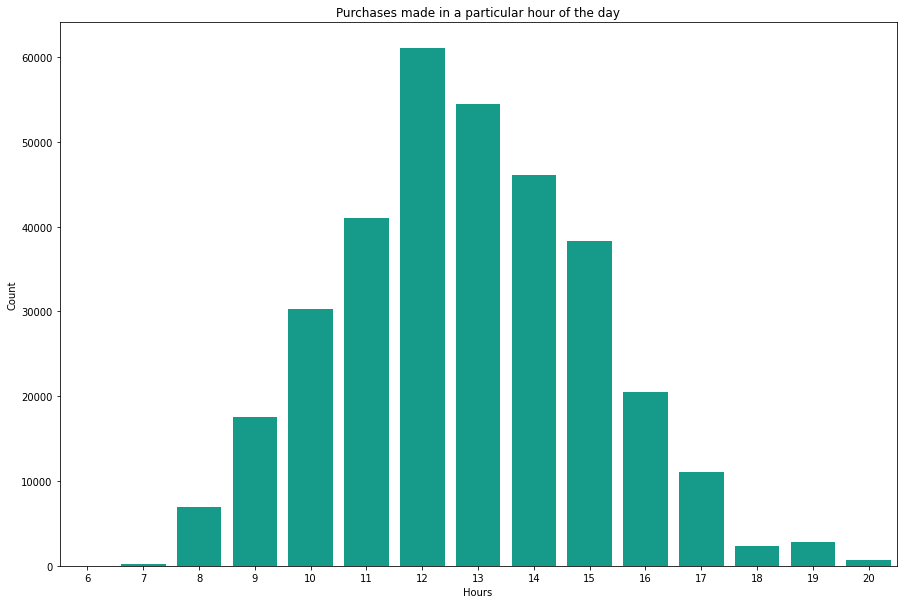

In [188]:
# Chart - 7 visualization code

hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
print(hour_df)

# plot the number of purchases w.r.t hour of the day
sns.barplot(x='Hours', y='Count', data=hour_df, color = '#00b09b')
plt.title('Purchases made in a particular hour of the day')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the time of the day in which maximum transactions are happening.

##### 2. What is/are the insight(s) found from the chart?

Most of the purchases are happening between 10 AM to 3 PM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With some more detailed info, one can understand the purchase time pattern on the site. As this is the online platform, still purchases are very less after 5 pm.

#### Chart - 8

**In which time of the day highest revenue is generated?**

day_time
Afternoon    2741395.942
Morning      1496779.922
Evening        61300.320
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

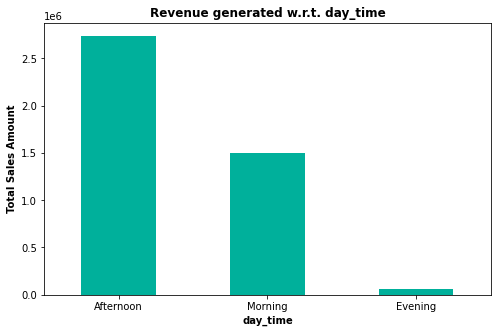

In [189]:
# Chart - 8 visualization code

time_revenue_df = df.groupby('day_time')['Sales_Amount'].sum().sort_values(ascending=False)
print(time_revenue_df)
time_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. day_time", weight ='bold')
plt.xlabel("day_time", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To check the time of the day when maximum revenue generates.

##### 2. What is/are the insight(s) found from the chart?

As we can see, maximum revenue is generated from the purchases made in the afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The comapny need to focus on the purchases made in the evening as they are generating very less revenue compared to other time of the day.

#### Chart - 9

**Which countries has the most number of customers?**

In [190]:
# Number of customers - countrywise
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country':'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,300303
1,Germany,7450
2,France,6891
3,EIRE,5444
4,Spain,2041


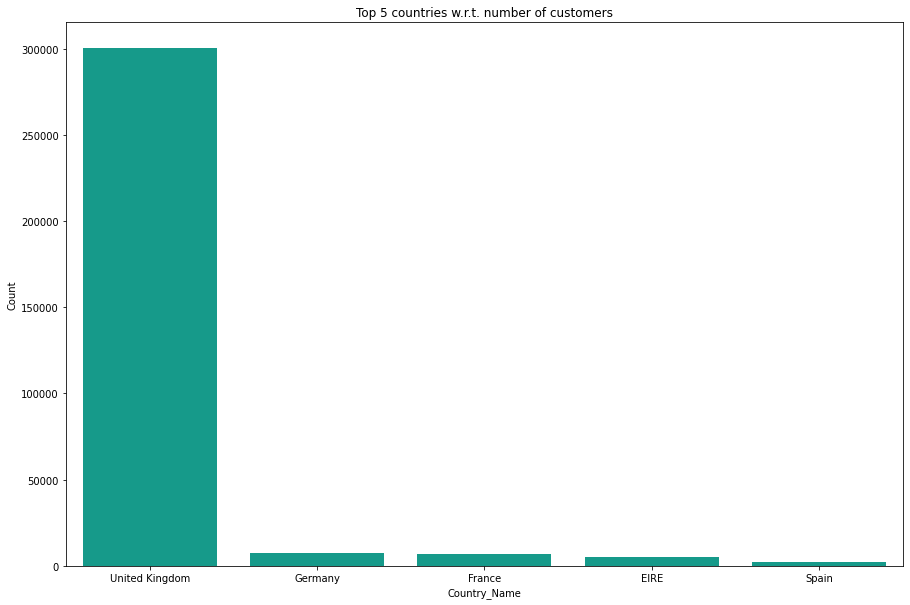

In [191]:
# Chart - 9 visualization code

sns.barplot(x='Country_Name', y='Count', data=country_df[:5], color = '#00b09b')
plt.title('Top 5 countries w.r.t. number of customers')
plt.show()


##### 1. Why did you pick the specific chart?

To see most of the customers are from which country on this online retail platform.

##### 2. What is/are the insight(s) found from the chart?

Out of total customers, lakhs of customers are from United Kingdom, whereas customers from other countries are hardly some thousands.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can do marketing of the online store to countries other than United Kingdom, which will surely gain the profit to the company.

#### Chart - 10

**Which are the most spending customers?**

CustomerID
14911    84980.89
13089    36347.88
14096    36019.84
17841    32224.59
14298    24387.53
12748    20519.88
14156    18276.11
13081    17925.53
15311    17712.96
14088    15700.62
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

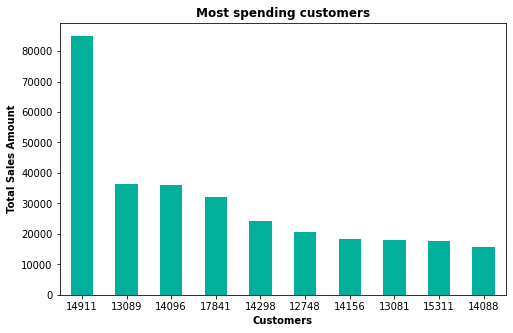

In [192]:
# Chart - 10 visualization code

cust_df = df.groupby('CustomerID')['Sales_Amount'].sum().sort_values(ascending=False)[:10]
print(cust_df)
cust_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Most spending customers", weight ='bold')
plt.xlabel("Customers", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To checkout spending capacities of the different customers.

##### 2. What is/are the insight(s) found from the chart?

CustomerID - 14911 has spent over 80k, which is more than double the amount spent by any customer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As there were cancelled transactions present in the dataset, we have to get more deeper approach to understand about the revenue. Here for the simplicity we have removed all cancelled transactions.

#### Chart - 11

**Distributions of Numerical features such as - Quantity, UnitPrice and Sales_Amount**

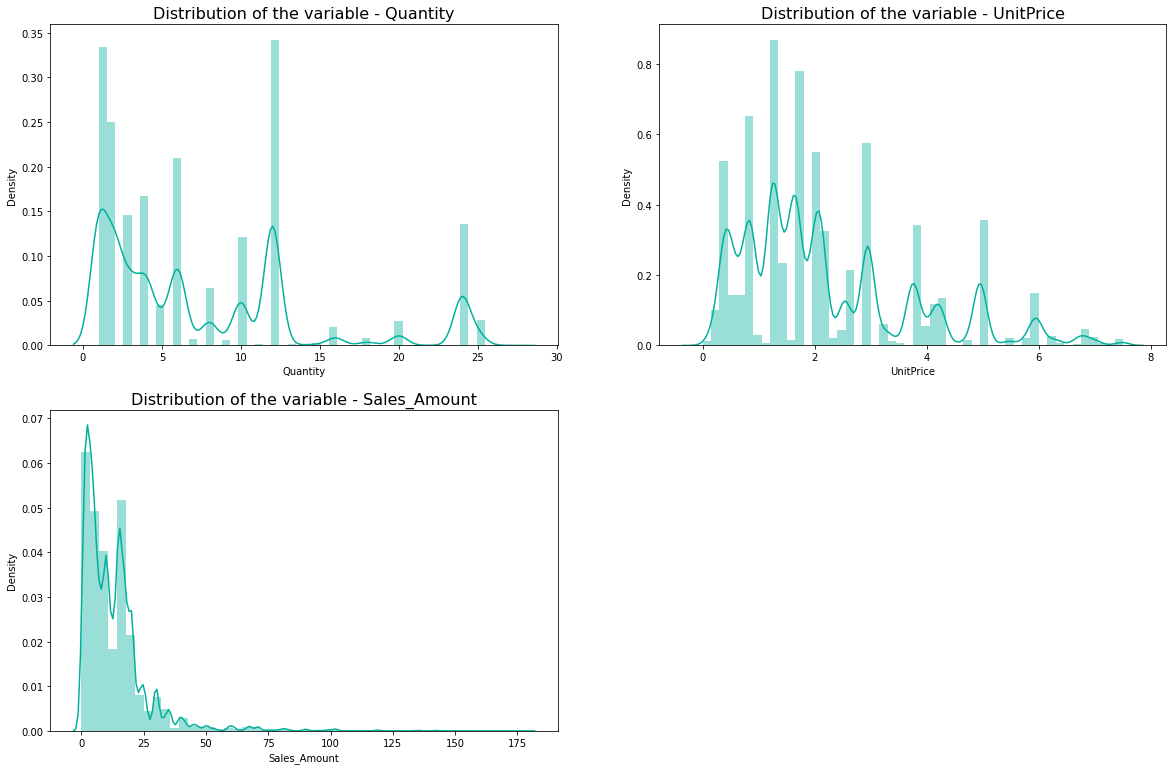

In [193]:
# Chart - 11 visualization code

# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'Sales_Amount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature], color = '#00b09b')
  plt.title(f"Distribution of the variable - {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

##### 1. Why did you pick the specific chart?

To understand the distributions of the numerical quantities.

##### 2. What is/are the insight(s) found from the chart?

* Quantity is discrete numerical variable. 

* From the distribution plot, we can say that unit price for most of the products ranges between 0.5 to 2.5

* Distribution of Sales_Amount is highly right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not sure!

#### Chart - 12 - Pair Plot

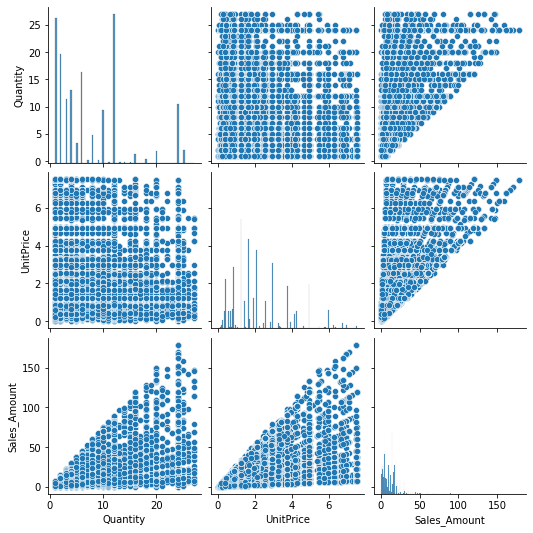

In [194]:
# Pair Plot visualization code


sns.pairplot(df, x_vars = ['Quantity', 'UnitPrice', 'Sales_Amount'],
                                      y_vars = ['Quantity', 'UnitPrice', 'Sales_Amount'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation heatmap')

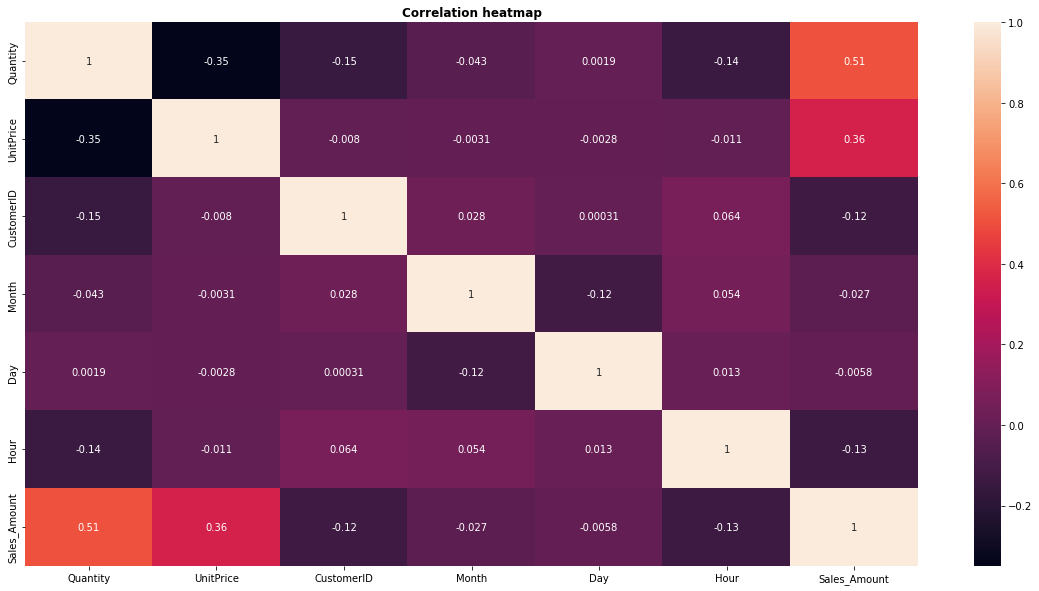

In [195]:
# Correlation Heatmap visualization code

corr = df.corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)
plt.title("Correlation heatmap", weight = 'bold')

##### 1. Why did you pick the specific chart?

To check the correlation among the features.

##### 2. What is/are the insight(s) found from the chart?

* We can see a high correlation between unitprice, quantity and Sales_Amount. This is obvious as we have created Sales_Amount column in such a way that it will be affected if there are changes in UnitPrice or Quantity.

* All other variables are not correlated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [196]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [197]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [198]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [199]:
# Handling Missing Values & Missing Value Imputation

# We have already handled missing values.

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

In [200]:
# Handling Outliers & Outlier treatments

# We have already dealt with outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [201]:
# Manipulate Features to minimize feature correlation and create new features

'''We have already created some new features like - Sales_Amount (obtained by multiplying Quantity and UnitPrice)
                                                  day_time, day_name, Month, Hour, etc'''

'We have already created some new features like - Sales_Amount (obtained by multiplying Quantity and UnitPrice)\n                                                  day_time, day_name, Month, Hour, etc'

#### 2. Feature Selection

In [202]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

# RFM Modeling - (Recency, Frequency, Monetary)

We are dividing our customers on the basis of 3 factors

Recency:- It represents how recently a customer purchased a product.

Frequency:- It represents how often a customer purchased a product. The more frequent will be the better score.

Monetary:- It represents how much an customer spends.

* Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm’s best clients based on the nature of their spending habits.

* An RFM analysis evaluates clients and customers by scoring them in three categories: how recently they’ve made a purchase, how often they buy, and the size of their purchases.

* The RFM model assigns a score of 1 to 5 (from worst to best) for customers in each of the three categories.

* RFM analysis helps firms reasonably predict which customers are likely to purchase their products again, how much revenue comes from new (vs. repeat) clients, and how to turn occasional buyers into habitual ones.

* Essentially, the RFM model corroborates the marketing adage that “80% of business comes from 20% of the customers.”

In [203]:
# Transform Your data

monetary =df.groupby("CustomerID").Sales_Amount.sum()

# Here we are getting our monetary value by grouping customer with their customer id and total no. of sales.


monetary = monetary.reset_index().rename(columns={'Sales_Amount':'Monetary'})
# Resetting our index,our monetary has multiindex so we are removing it


monetary.head()

,CustomerID,Monetary
0,12347,3314.73
1,12348,90.20
2,12349,999.15
3,12350,294.40
4,12352,1130.94


Now we will calculate frequency of our dataset

In [204]:
#calculating frequency

frequency=df.groupby("CustomerID").InvoiceNo.count()

# For calculating frequency here we are using groupby function grouping CustomerID along with the count of their invoice no. we can get our frequency


frequency = frequency.reset_index().rename(columns={'InvoiceNo':'Frequency'})
#resetting our index,our frequency has multiindex so we are removing it

frequency.head()

,CustomerID,Frequency
0,12347,166
1,12348,6
2,12349,58
3,12350,16
4,12352,66


Now we will calculate our recency value

In [205]:
#calculating our recency value

#last date available in our dataset
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [206]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,12,9)

In [207]:
# Lets create a date column for date values only
df['Purchase_Date'] = df.InvoiceDate.dt.date

In [208]:
recency = df.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [209]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)

In [210]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12347,2011-12-07,2011-12-09,2
1,12348,2011-04-05,2011-12-09,248
2,12349,2011-11-21,2011-12-09,18
3,12350,2011-02-02,2011-12-09,310
4,12352,2011-11-03,2011-12-09,36


In [211]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

Now we create a combined data frame

In [212]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [213]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,166,3314.73
12348,248,6,90.20
12349,18,58,999.15
12350,310,16,294.40
12352,36,66,1130.94


Let's visualize the data distribution in RFM table.

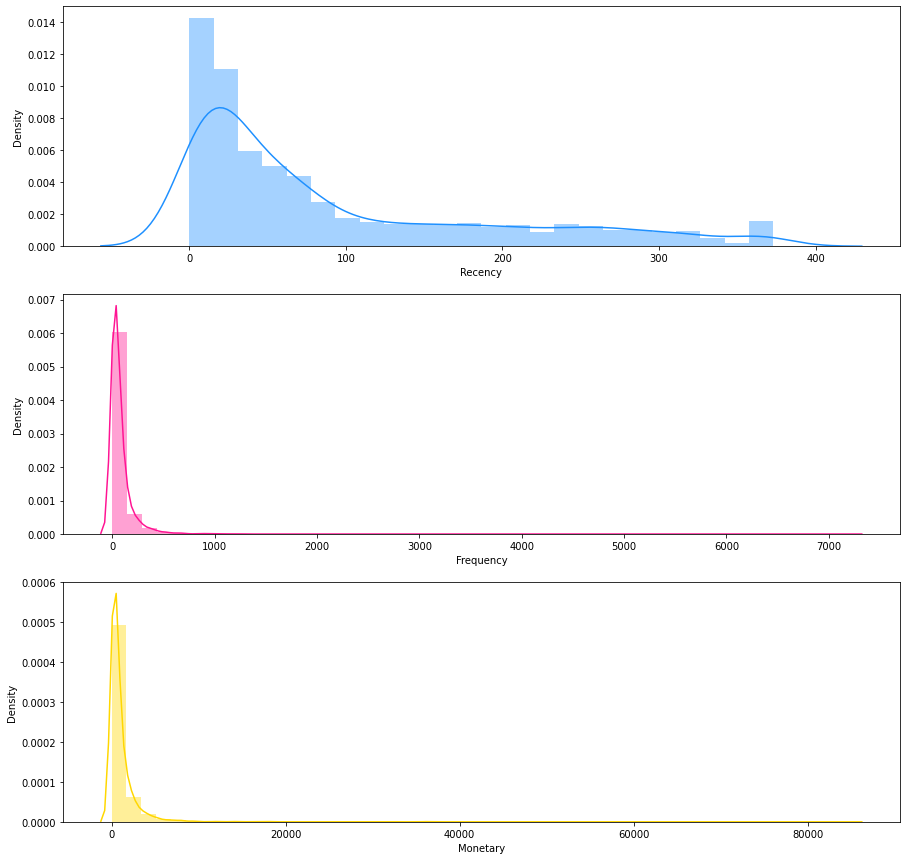

In [214]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')

plt.show()

**Customer segments with RFM Model**

>The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [215]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,14.0,206.120
0.50,50.0,36.0,465.770
0.75,143.0,87.0,1126.985


In [216]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 14.0, 0.5: 36.0, 0.75: 87.0},
 'Monetary': {0.25: 206.12, 0.5: 465.77, 0.75: 1126.9850000000001}}

**Creation of RFM Segments**

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good

In [217]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [218]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [219]:
# Now applying these functions to get Quantiles for Recency, Frequency and Monetary
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [220]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12347,2,166,3314.73,4,4,4
12348,248,6,90.20,1,1,1
12349,18,58,999.15,3,3,3
12350,310,16,294.40,1,2,2
12352,36,66,1130.94,3,3,4


For analysis it is critical to combine the scores to create a single score. There are few approaches. One approach is to just concatenate the scores to create a 3 digit number between 111 and 444. Here the drawback is too many categories (4x4x4).

In [221]:
rfm_segment['RFMGroup'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup
CustomerID,,,,,,,
12347,2,166,3314.73,4,4,4,444
12348,248,6,90.20,1,1,1,111
12349,18,58,999.15,3,3,3,333
12350,310,16,294.40,1,2,2,122
12352,36,66,1130.94,3,3,4,334


In [222]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_segment['RFMScore'] = rfm_segment[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347,2,166,3314.73,4,4,4,444,12
12348,248,6,90.20,1,1,1,111,3
12349,18,58,999.15,3,3,3,333,9
12350,310,16,294.40,1,2,2,122,5
12352,36,66,1130.94,3,3,4,334,10


Best Recency score = 4 (most recently purchase)

Best Frequency score = 4 (most frequently purchase)

Best Monetary score = 4 (who spent the most)

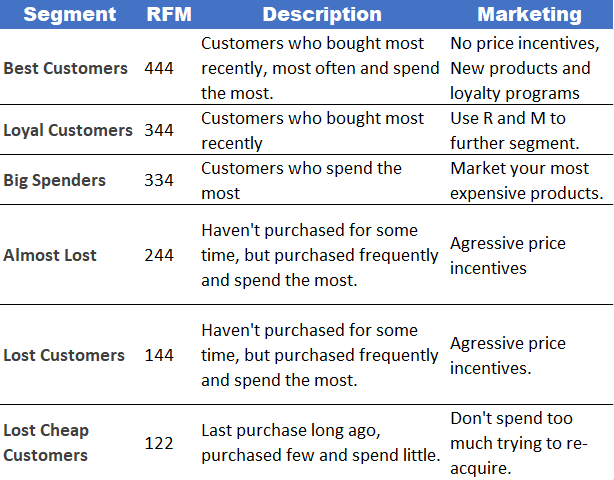

In [223]:
# Let's describe the table to see if there are any negative values
rfm_table.describe()

,Recency,Frequency,Monetary
count,4192.000000,4192.000000,4192.000000
mean,91.977576,79.500239,1025.638403
std,99.896494,200.419111,2199.980606
min,0.000000,1.000000,0.000000
25%,17.000000,14.000000,206.120000
50%,50.000000,36.000000,465.770000
75%,143.000000,87.000000,1126.985000
max,373.000000,7209.000000,84980.890000


We can observe that Monetary and recency contains 0 values. So first we need to make sure that minimum range of value starts from 1 otherwise log transformation may lead to errors in graph plotting as well as K-Means clustering. After that we will utilize log transformation and scaling to make data available for K-Means clustering.

In [224]:
# Create a copy of rfm table
rfm_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_scaled.Monetary = rfm_scaled.Monetary + abs(rfm_scaled.Monetary.min()) + 1
rfm_scaled.Recency = rfm_scaled.Recency + abs(rfm_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,4192.000000,4192.000000,4192.000000
mean,92.977576,79.500239,1026.638403
std,99.896494,200.419111,2199.980606
min,1.000000,1.000000,1.000000
25%,18.000000,14.000000,207.120000
50%,51.000000,36.000000,466.770000
75%,144.000000,87.000000,1127.985000
max,374.000000,7209.000000,84981.890000


### 6. Data Scaling

In [225]:
# Transform the data before K-Means clustering

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_scaled)

# Scaling your data

scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_scaled.index, columns=rfm_scaled.columns)

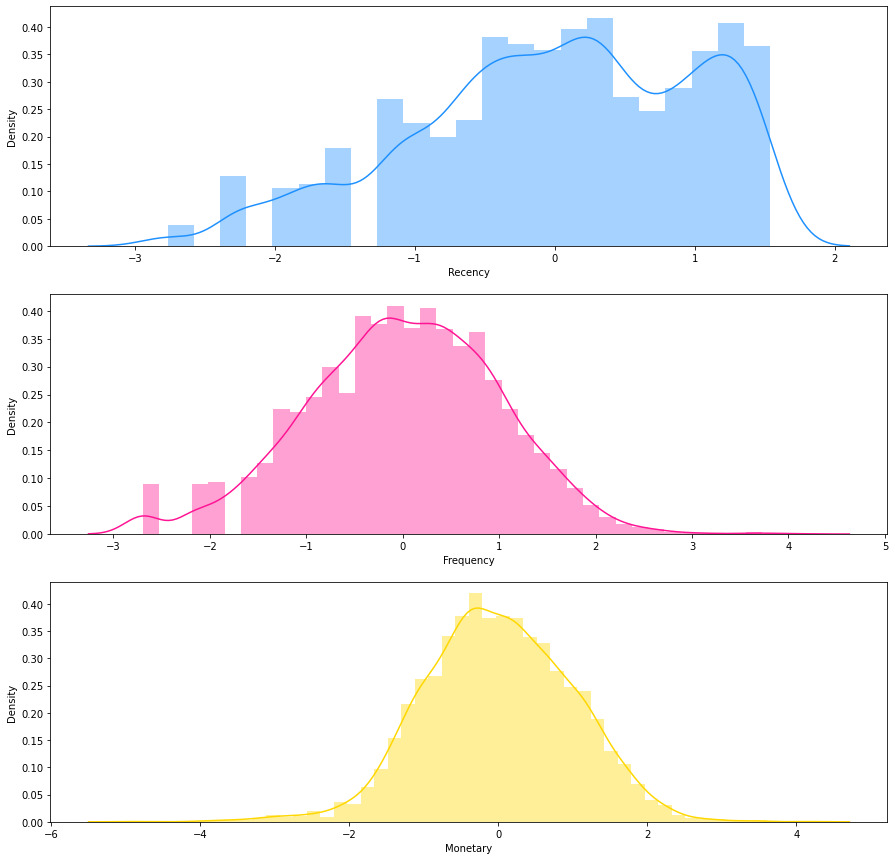

In [226]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show()

##### Which method have you used to scale you data and why?

I have used Standard Scalar for scaling the RFM model as, Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

## ***7. ML Model Implementation***

### ML Model - 1

### **Applying Silhouette Score Method on Recency, Frequency and Monetary**

For n_clusters = 2 The average silhouette_score is : 0.4020071499467207
For n_clusters = 3 The average silhouette_score is : 0.31081369637531847
For n_clusters = 4 The average silhouette_score is : 0.3118448791878626
For n_clusters = 5 The average silhouette_score is : 0.3028410901349483
For n_clusters = 6 The average silhouette_score is : 0.29226967735813913
For n_clusters = 7 The average silhouette_score is : 0.2855641685544965


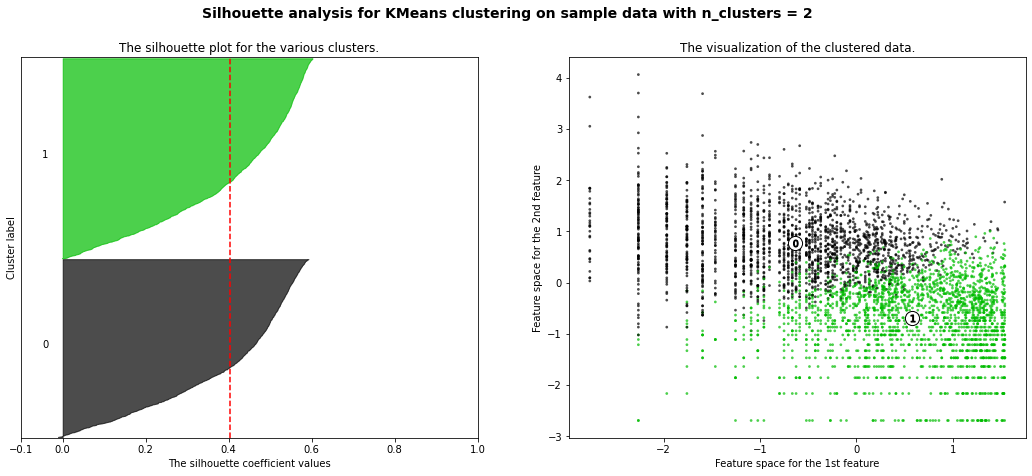

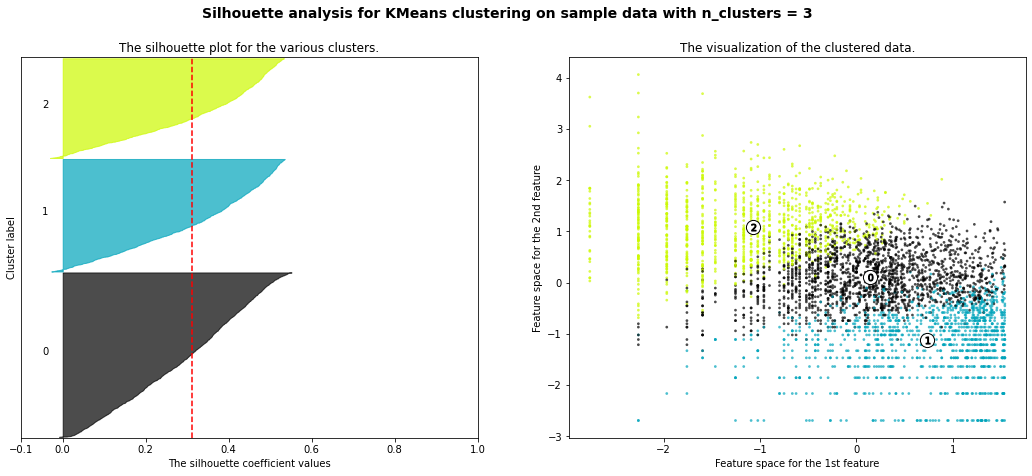

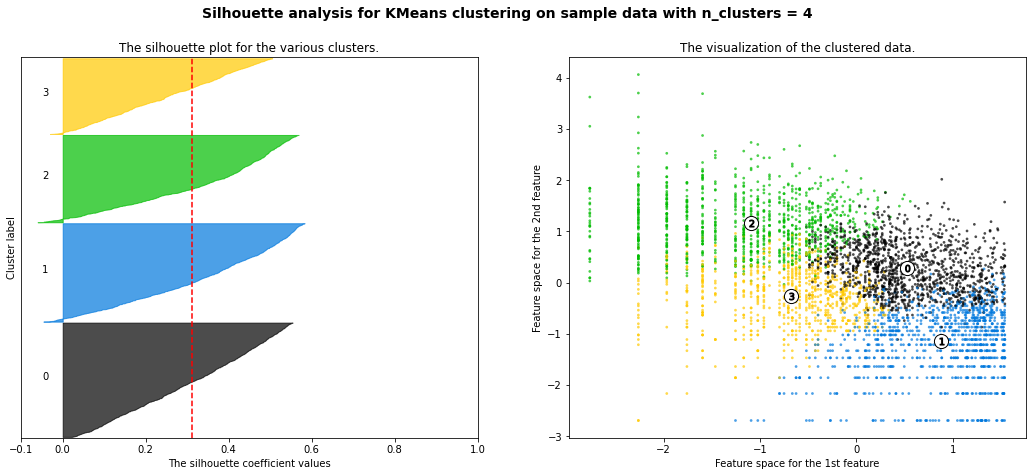

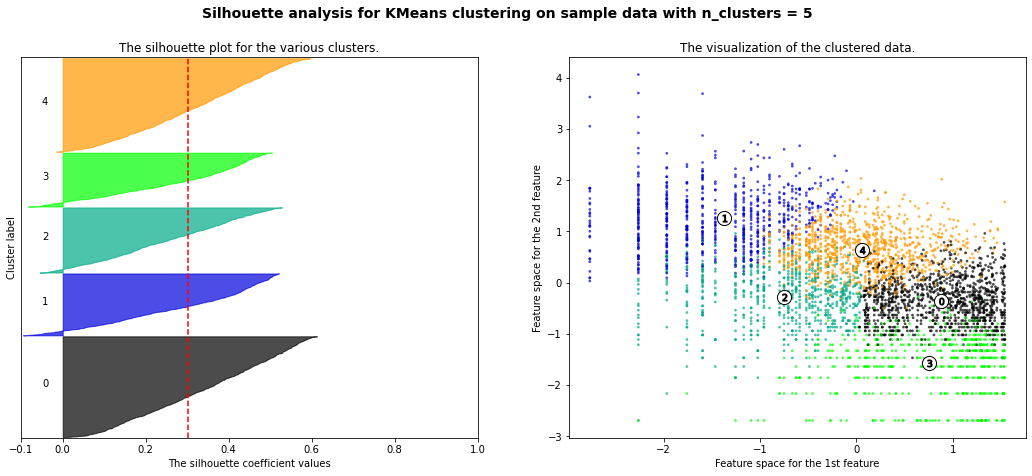

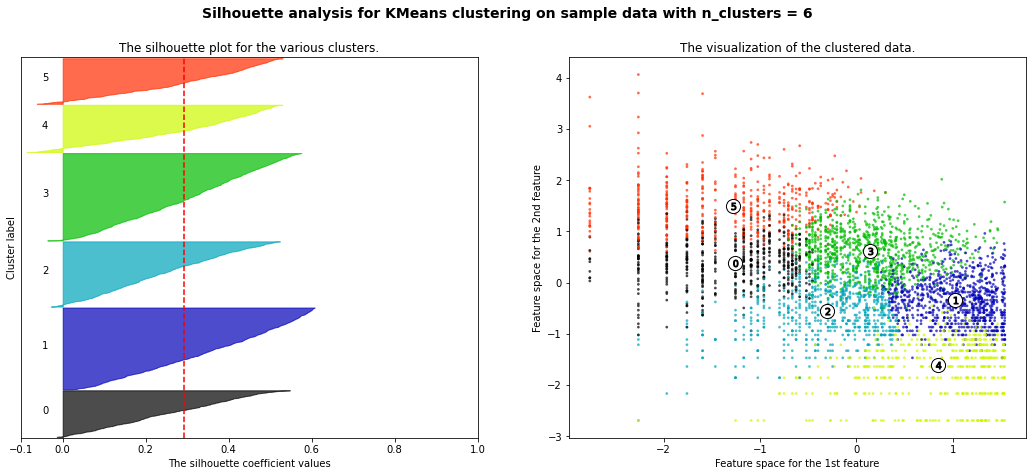

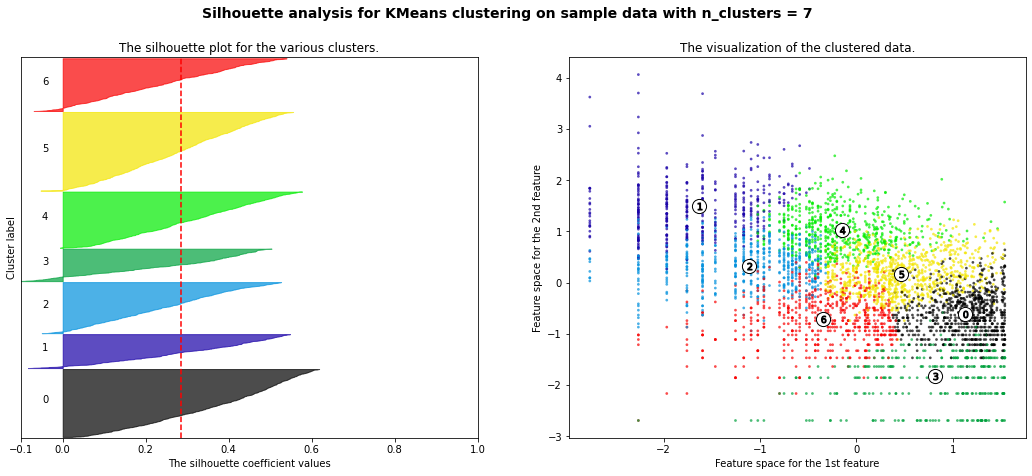

In [227]:
# ML Model - 1 Implementation K-Means Clustering using Silhouette score

X = normal_df[['Recency', 'Frequency', 'Monetary']].values

range_n_clusters = [2,3,4,5,6,7]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.

    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### :**Applying Elbow Method on Recency, Frequency and Monetary**

In [228]:
sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

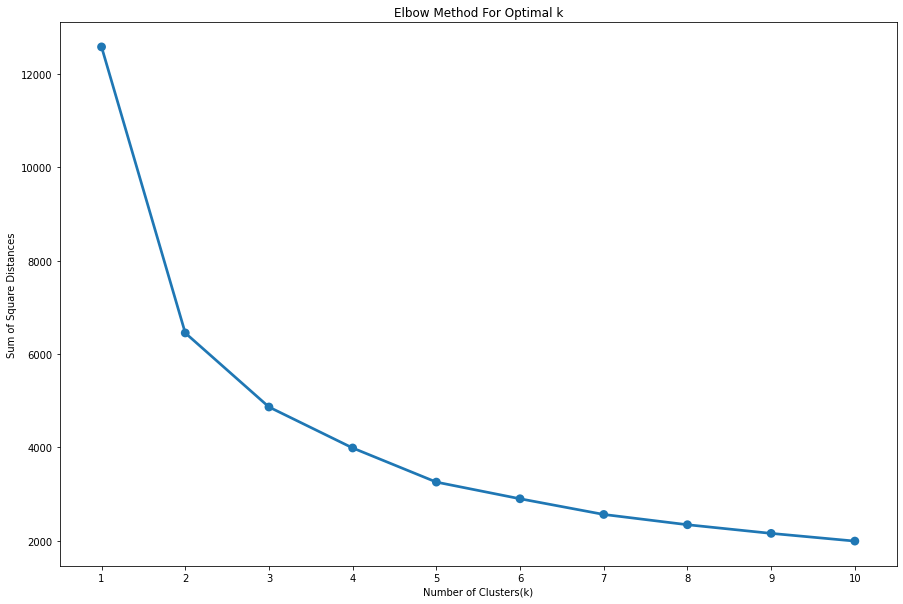

In [229]:
#Plot the graph for the sum of square distance values and Number of Clusters

sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here we see, after k = 2, inertia drop is minimal. Hence we can consider optimal number of clusters as k = 2.

In [230]:
# Fit the Algorithm

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [231]:
# Predict on the model

y_kmeans= kmeans.predict(X)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

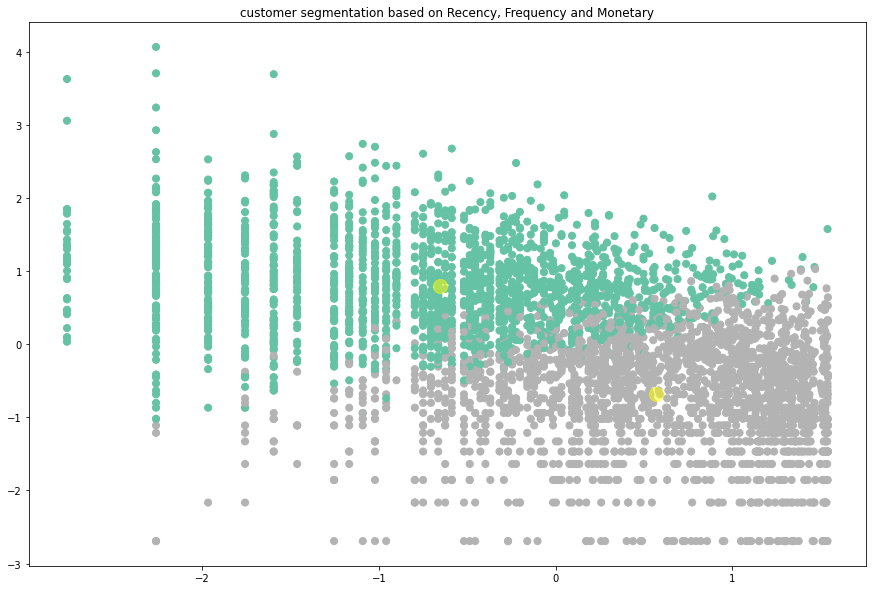

In [232]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set2')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

It is clearly seen that both the clusters are well separated.

### ML Model - 2

### **Applying DBSCAN on Recency, Frequency and Monetary**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

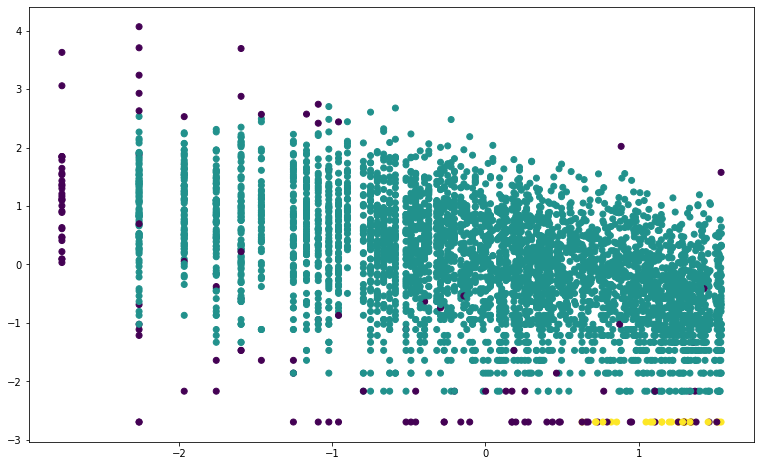

In [233]:
# Visualizing evaluation Metric Score chart

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

## **Cohort Analysis**

**Types of Cohort -**

1. **Time Cohorts** are customers who signed up for a product or service during a particular time frame. Analysing these cohorts shows the customers’ behaviour depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.

2. **Behaviour cohorts** are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design custom-made services or products for particular segments.

3. **Size cohorts** refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time

In [234]:
# select only limited columns and copying it into new dataframe
df_cohort = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Sales_Amount']].copy()


df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**For cohort analysis, there are a few labels that we have to create:**

1. **Invoice Month:** A string representation of the year and month of a single transaction/invoice.

2. **Cohort Month:** A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.

3. **Cohort period:** A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [235]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.strftime('%Y-%m')
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [236]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [237]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     333265 non-null  object        
 1   StockCode     333265 non-null  object        
 2   Description   333265 non-null  object        
 3   Quantity      333265 non-null  int64         
 4   InvoiceDate   333265 non-null  datetime64[ns]
 5   UnitPrice     333265 non-null  float64       
 6   CustomerID    333265 non-null  int64         
 7   Country       333265 non-null  object        
 8   Sales_Amount  333265 non-null  float64       
 9   InvoiceMonth  333265 non-null  datetime64[ns]
 10  CohortMonth   333265 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 38.6+ MB


In [238]:
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [239]:
# Let us check some rows in the cohort dataframe
df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_Amount,InvoiceMonth,CohortMonth,CohortPeriod
465557,576246,22470,HEART OF WICKER LARGE,3,2011-11-14 13:42:00,2.95,17566,United Kingdom,8.85,2011-11-01,2011-11-01,0
395177,571028,20686,DOLLY MIXTURE CHILDREN'S UMBRELLA,1,2011-10-13 12:21:00,3.25,16770,United Kingdom,3.25,2011-10-01,2010-12-01,10
339602,566601,22489,PACK OF 12 TRADITIONAL CRAYONS,1,2011-09-13 15:57:00,0.42,16469,United Kingdom,0.42,2011-09-01,2011-04-01,5
261655,559878,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,4,2011-07-13 11:19:00,2.10,15493,United Kingdom,8.40,2011-07-01,2011-03-01,4
458868,575852,21675,BUTTERFLIES STICKERS,12,2011-11-11 12:17:00,0.85,17238,United Kingdom,10.20,2011-11-01,2010-12-01,11


In [240]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,833.0,302.0,261.0,307.0,295.0,330.0,301.0,279.0,289.0,316.0,306.0,417.0,213.0
2011-01-01,399.0,83.0,106.0,91.0,125.0,114.0,98.0,97.0,121.0,130.0,144.0,47.0,NaN
2011-02-01,359.0,64.0,67.0,101.0,97.0,88.0,87.0,95.0,92.0,109.0,24.0,NaN,NaN
2011-03-01,442.0,64.0,110.0,87.0,100.0,74.0,112.0,103.0,121.0,38.0,NaN,NaN,NaN
2011-04-01,288.0,58.0,58.0,57.0,54.0,68.0,63.0,72.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,277.0,51.0,47.0,47.0,59.0,62.0,76.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,231.0,40.0,34.0,62.0,54.0,75.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,193.0,31.0,40.0,45.0,54.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,31.0,42.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations :**

---


1. The above table show retention and acquisition of customers.

2. Vertically i.e. the first column '0' tells how many new customers the business acquired in a particular month. ex: 833 is the number of customers business acquired in Dec'2010, 399 is the number of customers(different from previous month) business acquired in Jan'2011, and so on.

3. Horizontally i.e the first row tells the number of customers who is continuing to be part of business since their first purchase i.e. Dec'2010. ex: 302 is the number of customers out of 833 that continue to purchase one month after their first purchase, 261 is the number of customers that continue to purchase two months after their first purchase, and so on.

In [241]:
# Retention table

cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,36.3,31.3,36.9,35.4,39.6,36.1,33.5,34.7,37.9,36.7,50.1,25.6
2011-01-01,100.0,20.8,26.6,22.8,31.3,28.6,24.6,24.3,30.3,32.6,36.1,11.8,NaN
2011-02-01,100.0,17.8,18.7,28.1,27.0,24.5,24.2,26.5,25.6,30.4,6.7,NaN,NaN
2011-03-01,100.0,14.5,24.9,19.7,22.6,16.7,25.3,23.3,27.4,8.6,NaN,NaN,NaN
2011-04-01,100.0,20.1,20.1,19.8,18.8,23.6,21.9,25.0,6.9,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.4,17.0,17.0,21.3,22.4,27.4,9.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.3,14.7,26.8,23.4,32.5,10.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.1,20.7,23.3,28.0,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,18.7,25.3,24.7,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,22.7,30.9,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations :**

1. The above table is nothing but showing value in percentages.

2. We can see that over the period of time how the customer interact with the business. ex- In Jan'2011 the business acquire some new customers but after one month only 20.8% are retained or say revisit again. Then the number rise to 26.6% which means some customers back and purchase again and the reason could be an invitation/offers is sent to those group of customers.

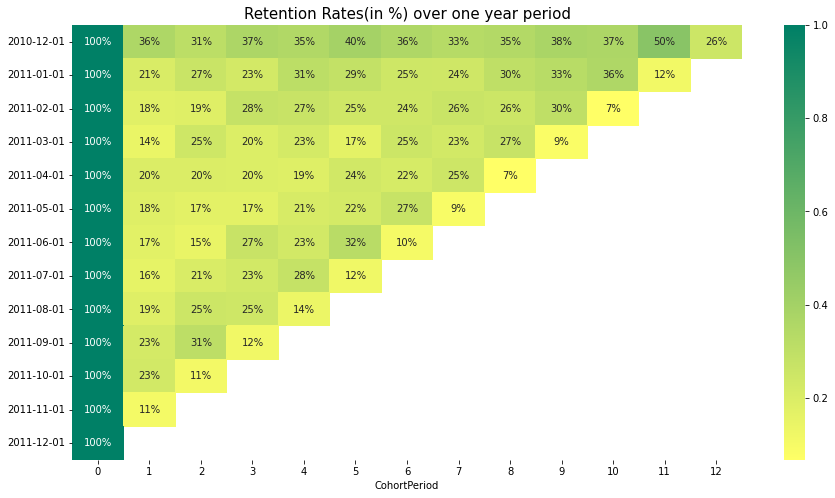

In [242]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()

In [243]:
# Average amount spent by the customers over the time

amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Sales_Amount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,13.11,14.26,13.25,12.59,12.59,13.24,12.67,12.42,12.59,14.10,13.80,12.49,13.5
2011-01-01,12.51,13.09,11.08,11.86,14.05,14.48,15.03,13.26,13.68,13.45,11.90,11.40,NaN
2011-02-01,13.58,12.31,12.74,14.75,14.61,13.03,15.79,17.67,13.89,16.24,15.43,NaN,NaN
2011-03-01,13.31,14.81,15.86,13.43,14.94,15.01,16.64,13.77,12.09,9.87,NaN,NaN,NaN
2011-04-01,13.23,15.56,13.25,14.96,13.60,12.39,12.97,12.79,10.90,NaN,NaN,NaN,NaN
2011-05-01,14.12,11.84,15.09,16.18,16.21,11.72,13.64,11.54,NaN,NaN,NaN,NaN,NaN
2011-06-01,12.14,9.92,14.32,13.72,11.67,11.31,10.25,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,11.51,17.61,11.63,12.63,9.18,11.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,13.30,9.35,9.80,11.27,13.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations :**

1. The above table shows the average amount spent by the group of customers over the period of time.
2. ex: For the group of customers of Jan'2011 they initially spent 12.51 but after one month they spent 13.09 higher than the previous, then they spend 11.08 after two months and so on.

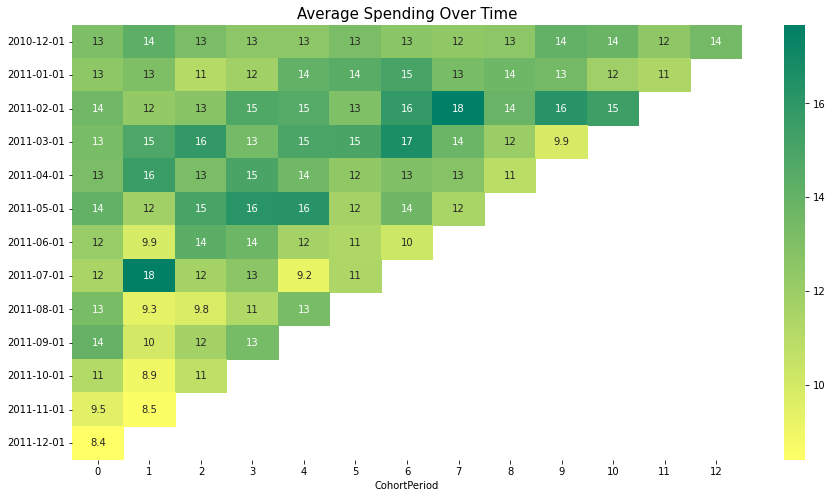

In [244]:
#Build the heatmap or pictorial representation of above table

amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()

Finally, we are at the end of the excercise, let us make conclusions related to our analysis.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To find optimal number of clusters I think, Silhouette score is the best.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Once we know the number of clusters, we use K-Means clustering algorithm  to predict about the customers, in which cluster they will be.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [245]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [246]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Throughout the exercise, we went through various steps to perform customer segmentation. We started with importing data and important libraries. Then, did rigorous data wrangling.

* We have performed RFM Analysis on the data, where we clustered customers based on Recency, Monetary and Frequency aspect. We used Elbow method, Silhouette score method to find appropriate number of clusters. We discovered 4 clusters based on RFM data.

* Further, did cohort analysis to understand how retention and acquisition rate, average amount spends changes over the time.

* However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations. The clustering can also be performed on new set of features such as type of products each customer prefers to buy often, finding out customer lifetime value (clv) and much more.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***